# Assignment 10

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?

>在贝叶斯公示$P(c|x)=\frac{P(c)P(x|c)}{P(x)}$中，估计后验概率$P(c|x)$的主要难点在于：类条件概率$P(x|c)$是所有属性上的联合概率，很难从有限的训练样本直接估计得到。而朴素贝叶斯(Naive bayes)采用了“属性条件独立性假设”：对已知类别，假设所有属性互相独立，也就是说$P(AB)=P(A)P(B)$。在这个假设下$P(x|c)=\prod_{i=1}^{d}P(x_i|c)$，而条件概率$P(x_i|c)$可以从样本中估计出来

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?

>最大后验估计(MAP, maximum a posterior estimation): $$h_{MAP}=arg\; \mathop{max}_{h \in H}P(h|D)=arg\;\mathop{max}_{h \in H}\frac{P(D|h)P(h)}{P(D)}$$
MAP最求的是在恒定的观测数据$D$下找出使后验概率$P(h|D)$最大的$h$。所以$P(D)$是恒定的，不影响优化结果，因此上述式子可以简化为$arg\;\mathop{max}_{h \in H}P(D|h)P(h)$，即找到最大化$P(D|h)P(h)$的$h$。

>极大似然估计(MLE, maximum likelihood estimation): $$h_{ML}=arg\;\mathop{max}_{h \in H}P(D|h)$$
ML寻求的是最大化$P(D|h)$(likelihood)的值。

>MLE提供了一种给定观察数据来评估模型参数的方法，即“模型已定，参数位置”，求使模型最优时的参数<br>
MAP和MLE类似，但是最大的区别在于，MLE假定模型参数本身的概率(即先验概率)是均匀的，而MAP需要考虑模型参数本身的概率分布。

#### 3. What is support vector in SVM?

>支持向量(support vector)指对分割超平面有贡献的样本点。因为分割超平面是由落在分割边界上的点来决定的，其他点不管有多少，都不影响分割超平面的位置，因此把那些支撑起分割超平面的样本点成为SVM中的支持向量

#### 4. What is the intuition behind SVM ?

>SVM的直观认识：用一个几何间距最大的超平面将带标签的数据分隔。比如在二维空间中有2类点，红点和蓝点，SVM就是找一个宽为d的直线把红点和蓝点分隔在两边，同时使d最大。

#### 5. Shortly describ what 'random' means in random forest ?

>随机体现在两方面：1)随机取样本组成样本集合；1)随机选择特征进行节点分裂

#### 6. What cariterion does XGBoost use to find the best split point in a tree ?

>XGBoost里的分裂准则是直接和损失函数挂钩的准则，根据这个准则，计算增益$Gain=\frac{1}{2}[\frac{G_L^2}{H_L+\lambda}+\frac{G_R^2}{H_R+\lambda}-\frac{(G_L+G_R)^2}{H_L+H_R+\lambda}]-\gamma$。其实就是让分裂后的增益减分裂钱的增益最大，或者说，选择让损失减少最多的分裂方法(增益越大，即损失函数越小)

### 3. Practial part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

###### 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).

>为了方便编写和阅读，Practial part(包括Optional question)都一起写在下面

#### 对问题解决方案的初步构思

> 目标：输入->新闻，输入->新闻是否出自新华社(boolean) <br>
解决方案：
- 文章向量化
    - 文章向量化的方式有很多种，但是必须保证不同的新闻输入模型后输出的向量size一致
    - 这里选用2种方式来向量化
        - 基于统计，词袋模型+TF-IDF对全文词向量进行加权平均得到文章向量
        - 基于向量，word2vec+SIF得到文章向量(直接用project1的内容即可)
- 机器学习算法选择
    - 该问题是分类问题，而且是二分类问题，可以用多种方式解决
        - KNN
        - Naive Bayes
        - SVM
        - Random Forest
        - XGBoost
- 模型测试(参数调优)(可视化)
    - 模型评估标准的选择
- 模型选择

###### 数据预处理

>- 读取数据并设置对应的标签(新华社=1，非新华社=0)

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = '../lecture5/sqlResult_1558435.csv'
news = pd.read_csv(path, encoding='gb18030')

In [3]:
news = news.loc[:, ['source', 'title', 'content']]
# 设置标签
news.loc[news['source'] != '新华社', 'source'] = 0
news.loc[news['source'] == '新华社', 'source'] = 1

X = news.loc[:, ['title', 'content']]
y = news.loc[:, ['source']]

In [4]:
X.head()

,title,content
0,小米MIUI 9首批机型曝光：共计15款,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1,骁龙835在Windows 10上的性能表现有望改善,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
2,一加手机5细节曝光：3300mAh、充半小时用1天,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...
3,葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n
4,44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...


In [5]:
y.head()

,source
0,0
1,0
2,0
3,1
4,0


In [6]:
import re
import jieba

In [7]:
# 读取中文停用词
with open('stopwords.dat', 'r') as f:
    stopwords = [w.strip() for w in f.readlines()]

In [8]:
len(stopwords)

1893

In [9]:
# 最后对比一下去掉新华社这个词自后的效果
# stopwords.append('新华社')

In [10]:
# 输入：标题+内容，输出：切分好的token
def tokenize(content, title=None):
    article = str(title) + ' ' + str(content)
    # 替换换行符和特殊分隔符
    article = re.sub('\\\\n|[\n\u3000\r]', ' ', article)
    # 替换标点符号
    punctuation = '！？｡。，＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘\'‛“”„‟…‧﹏' + '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~·ʔ•'
    article = re.sub('[{}]'.format(punctuation), ' ', article)
    tokens = [token.strip() for token in jieba.cut(article) if token.strip() if token.strip() not in stopwords]
    return tokens

In [11]:
# 测试tokenize
title, content = X.loc[3, :]
tokenize(content, title)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/qn/yh63v8fn5fd2l36nndjc3tw80000gn/T/jieba.cache
Loading model cost 1.318 seconds.
Prefix dict has been built succesfully.


['葡',
 '森林',
 '火灾',
 '至少',
 '62',
 '死亡',
 '政府',
 '紧急状态',
 '组图',
 '这是',
 '月',
 '18',
 '日',
 '葡萄牙',
 '中部',
 '佩德罗',
 '冈',
 '地区',
 '拍摄',
 '森林',
 '大火',
 '烧毁',
 '汽车',
 '新华社',
 '记者',
 '张立',
 '云摄']

##### 向量化

把每篇新闻看作一个sentence

In [12]:
sentences = [' '.join(tokenize(X.iloc[i, 0], X.iloc[i, 1])) for i in range(X.shape[0])]

In [43]:
with open('sentences.txt', 'w') as f:
    for s in sentences:
        f.write(s+'\n')

In [11]:
with open('sentences.txt', 'r') as f:
    sentences = [s.strip() for s in f.readlines()]

In [12]:
len(sentences)

89611

###### 词袋模型+TF-IDF

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [190]:
# 词->词频
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(sentences)

In [15]:
X_c.shape

(89611, 245299)

In [16]:
# 词频矩阵 -> TF-IDF值
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X_c)
tfidf.shape

(89611, 245299)

In [17]:
y_c = y['source'].values

In [18]:
y_c.shape

(89611,)

###### word2vec+SIF

word2vec

In [19]:
from gensim.models import word2vec

In [20]:
model = word2vec.Word2Vec(sentences, size=200)

In [21]:
model.save('model_200')

SIF

In [22]:
from sklearn.decomposition import PCA

In [23]:
model = word2vec.Word2Vec.load('model_200')

In [24]:
total = 0
for k in model.wv.vocab.keys():
    total += model.wv.vocab[k].count
total

39938957

In [25]:
def get_fre(w):    
    return model.wv.vocab[w].count / total

In [26]:
# Step 1
def sif_s1(s:list, a=1e-3, d=200, model=model) -> np.array:
    v = np.zeros(d,)
    count = 0
    for w in s:
        if w not in model.wv: continue
        we_w = a / (a + get_fre(w)) * model.wv[w]
        v += we_w
        count += 1
    if count > 0:
        return v / count
    else:
        return None

# Step 2
def sif_s2(s:np.array) -> np.array:
    pca = PCA(n_components=1)
    pca.fit(s)
    pc = pca.components_
    return s - s.dot(pc.T) * pc

In [27]:
sif1 = [sif_s1(s.split()) for s in sentences]

In [28]:
len(sif1)

89611

In [29]:
sif1_ = []
y_v = []
for s, yi in zip(sif1, y['source'].values):
    if type(s) != type(None):
        sif1_.append(s)
        y_v.append(yi)

In [30]:
y_v = np.array(y_v)

In [31]:
len(sif1_)

88481

In [32]:
X_v = np.zeros([len(sif1_), 200])

In [33]:
for i in range(len(sif1_)):
    X_v[i,:] = sif1_[i]

In [34]:
X_v = sif_s2(X_v)

In [35]:
X_v.shape

(88481, 200)

In [36]:
y_v.shape

(88481,)

##### 划分训练集和测试集

In [47]:
from sklearn.model_selection import train_test_split

In [38]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(tfidf, y_c, test_size=0.2, random_state=0)

In [39]:
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_v, y_v, test_size=0.2, random_state=0)

#### 机器算法

###### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [262]:
knn_c = KNeighborsClassifier()

In [264]:
knn_c.fit(Xc_train, yc_train.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [267]:
knn_c.score(Xc_test, yc_test.astype(int))

0.9433130614294482

In [268]:
knn_v = KNeighborsClassifier()

In [269]:
knn_v.fit(Xv_train, yv_train.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [270]:
knn_v.score(Xv_test, yv_test.astype(int))

0.9234333502853591

###### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# 维度太多，词袋模型下的向量无法用贝叶斯
# gnb_c = GaussianNB()
# gnb_c.fit(Xc_train.toarray(), yc_train.astype(int))

In [49]:
gnb_v = GaussianNB()

In [51]:
gnb_v.fit(Xv_train, yv_train.astype(int))

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
gnb_v.score(Xv_test, yv_test.astype(int))

0.7905294682714584

###### SVM

In [65]:
from sklearn.svm import LinearSVC

In [43]:
lsvc_c = LinearSVC()

In [44]:
lsvc_c.fit(Xc_train, yc_train.astype(int))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
lsvc_c.score(Xc_test, yc_test.astype(int))

0.9878926518997936

In [51]:
lsvc_v = LinearSVC()

In [52]:
lsvc_v.fit(Xv_train, yv_train.astype(int))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [53]:
lsvc_v.score(Xv_test, yv_test.astype(int))

0.9160309657004012

###### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc_c = RandomForestClassifier()

In [56]:
rfc_c.fit(Xc_train, yc_train.astype(int))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
rfc_c.score(Xc_test, yc_test.astype(int))

0.9736093287954025

In [58]:
rfc_v = RandomForestClassifier()

In [59]:
rfc_v.fit(Xv_train, yv_train.astype(int))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
rfc_v.score(Xv_test, yv_test.astype(int))

0.9212295869356388

###### XGBoost

In [67]:
from xgboost.sklearn import XGBClassifier

In [62]:
xgb_c = XGBClassifier()

In [63]:
xgb_c.fit(Xc_train, yc_train.astype(int))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [64]:
xgb_c.score(Xc_test, yc_test.astype(int))

0.9916308653685209

In [65]:
xgb_v = XGBClassifier()

In [66]:
xgb_v.fit(Xv_train, yv_train.astype(int))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [67]:
xgb_v.score(Xv_test, yv_test.astype(int))

0.9157484319376166

#### 简单评估

>在没有调参数的情况下，基于统计的词袋模型比word2vec效果好。在机器算法中，用score作为评价方式，效果是XGBoost > RF > SVM > KNN，Naive Bayes在这里效果很差。

#### 调参

>评价标准的选择：<br>
所使用的数据里新华社新闻的占比高达87%，因此单纯的用准确率来描述模型效果是不合适的。这里采用多种评价指标对模型调参进行描述:
- Accuracy
- Precision
- Recall
- F1
- AUC

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [39]:
import matplotlib.pyplot as plt

In [187]:
class paramAdjusting:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def split(self, size=0.3):
        # 本来想在调参的时候对每一个参数做N次计算然后取均值，但是计算量太大，于是就固定了测试集的划分
        return train_test_split(self.X, self.y, test_size=size, random_state=0)
        
    def get_score(self, y, y_pred):
        acc = accuracy_score(y, y_pred)
        prec = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        auc = roc_auc_score(y, y_pred)
        return acc, prec, recall, f1, auc
    
    def knn(self, n_neighbors=5):
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        return self.pipe(knn)
    
    def svm(self, C=1.0, max_iter=1000):
        svm = LinearSVC(C=C, max_iter=max_iter)
        return self.pipe(svm)
    
    def rfc(self, n_estimators=10, max_depth=None):
        rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        return self.pipe(rfc)
    
    def xgb(self, n_estimators=100):
        xgb = XGBClassifier(n_estimators=n_estimators)
        return self.pipe(xgb)
    
    def pipe(self, model):
        X_train, X_test, y_train, y_test = self.split()
        model.fit(X_train, y_train.astype(int))
        y_pred = model.predict(X_test)
        return self.get_score(y_test.astype(int), y_pred)
    
        
        

In [188]:
pa = paramAdjusting(tfidf, y_c)

In [105]:
def initialize_score():
    scores = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'auc': []
    }
    return scores

In [106]:
def add_score(scores, score):
    scores

In [134]:
def draw(x, ys):
    metrics = ys.keys()
    for m in metrics:
        plt.plot([i for i in range(len(x))], ys[m], label=m)
    plt.xticks([i for i in range(len(x))], x)
    plt.legend()
    plt.show()

In [146]:
def print_score(p_name, params, scores):
    for i in range(len(params)):
        print('{}={:<6}, accu={:.4f}, prec={:.4f}, recall={:.4f}, f1={:.4f}, auc={:.4f}'.format(p_name, params[i], scores['accuracy'][i], scores['precision'][i], scores['recall'][i], scores['f1'][i], scores['auc'][i]))

###### KNN调参

n_neighbors

In [153]:
knn_params = [i for i in range(1, 11)]

In [154]:
scores = initialize_score()

In [155]:
for p in knn_params:
    score = pa.knn(n_neighbors=p)
    scores['accuracy'].append(score[0])
    scores['precision'].append(score[1])
    scores['recall'].append(score[2])
    scores['f1'].append(score[3])
    scores['auc'].append(score[4])

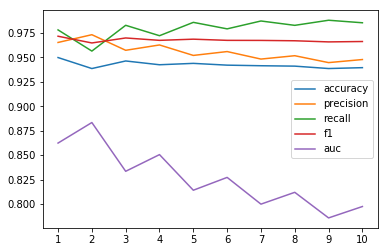

In [156]:
draw(knn_params, scores)

In [157]:
print_score('n_neighbor', knn_params, scores)

n_neighbor=1     , accu=0.9498, prec=0.9652, recall=0.9781, f1=0.9716, auc=0.8624
n_neighbor=2     , accu=0.9386, prec=0.9731, recall=0.9564, f1=0.9647, auc=0.8833
n_neighbor=3     , accu=0.9463, prec=0.9572, recall=0.9828, f1=0.9698, auc=0.8335
n_neighbor=4     , accu=0.9424, prec=0.9627, recall=0.9721, f1=0.9674, auc=0.8506
n_neighbor=5     , accu=0.9438, prec=0.9520, recall=0.9858, f1=0.9686, auc=0.8141
n_neighbor=6     , accu=0.9420, prec=0.9559, recall=0.9791, f1=0.9674, auc=0.8273
n_neighbor=7     , accu=0.9414, prec=0.9482, recall=0.9872, f1=0.9673, auc=0.7999
n_neighbor=8     , accu=0.9410, prec=0.9517, recall=0.9827, f1=0.9669, auc=0.8120
n_neighbor=9     , accu=0.9386, prec=0.9446, recall=0.9879, f1=0.9658, auc=0.7858
n_neighbor=10    , accu=0.9394, prec=0.9478, recall=0.9853, f1=0.9662, auc=0.7975


综合auc和其他参数考虑，n_neighbor=4时模型表现较优

###### SVM调参

c

In [125]:
cs = [1e-3, 1e-2, 1e-1, 1.0, 10, 100, 1000]

In [126]:
scores = initialize_score()

In [128]:
for c in cs:
    score = pa.svm(C=c)
    scores['accuracy'].append(score[0])
    scores['precision'].append(score[1])
    scores['recall'].append(score[2])
    scores['f1'].append(score[3])
    scores['auc'].append(score[4])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


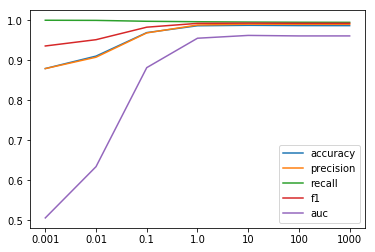

In [135]:
draw(cs, scores)

In [147]:
print_score('c', cs, scores)

c=0.001 , accu=0.8794, prec=0.8792, recall=1.0000, f1=0.9357, auc=0.5062
c=0.01  , accu=0.9104, prec=0.9076, recall=0.9997, f1=0.9514, auc=0.6343
c=0.1   , accu=0.9691, prec=0.9684, recall=0.9974, f1=0.9827, auc=0.8816
c=1.0   , accu=0.9862, prec=0.9881, recall=0.9963, f1=0.9922, auc=0.9551
c=10    , accu=0.9873, prec=0.9901, recall=0.9955, f1=0.9928, auc=0.9621
c=100   , accu=0.9866, prec=0.9898, recall=0.9950, f1=0.9924, auc=0.9608
c=1000  , accu=0.9865, prec=0.9899, recall=0.9948, f1=0.9923, auc=0.9609


可以看出在c=10时拟合效果最优，max_iter=1000时模型已经拟合，故不再继续作调整

###### Random Forest调参

n_estimators

In [158]:
n_estimators = [i*10 for i in range(1, 11)]

In [159]:
scores = initialize_score()

In [161]:
for e in n_estimators:
    score = pa.rfc(n_estimators=e)
    scores['accuracy'].append(score[0])
    scores['precision'].append(score[1])
    scores['recall'].append(score[2])
    scores['f1'].append(score[3])
    scores['auc'].append(score[4])

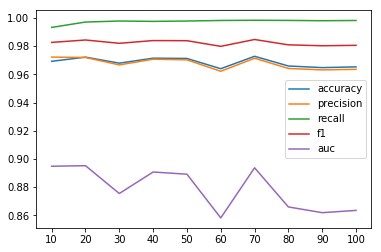

In [162]:
draw(n_estimators, scores)

In [163]:
print_score('n_estimators', n_estimators, scores)

n_estimators=10    , accu=0.9692, prec=0.9723, recall=0.9933, f1=0.9827, auc=0.8948
n_estimators=20    , accu=0.9722, prec=0.9720, recall=0.9971, f1=0.9844, auc=0.8952
n_estimators=30    , accu=0.9679, prec=0.9667, recall=0.9978, f1=0.9820, auc=0.8754
n_estimators=40    , accu=0.9715, prec=0.9707, recall=0.9976, f1=0.9840, auc=0.8907
n_estimators=50    , accu=0.9713, prec=0.9703, recall=0.9978, f1=0.9839, auc=0.8891
n_estimators=60    , accu=0.9640, prec=0.9622, recall=0.9982, f1=0.9799, auc=0.8581
n_estimators=70    , accu=0.9728, prec=0.9714, recall=0.9984, f1=0.9847, auc=0.8937
n_estimators=80    , accu=0.9659, prec=0.9642, recall=0.9983, f1=0.9809, auc=0.8659
n_estimators=90    , accu=0.9648, prec=0.9632, recall=0.9981, f1=0.9803, auc=0.8618
n_estimators=100   , accu=0.9653, prec=0.9636, recall=0.9982, f1=0.9806, auc=0.8635


n_estimators=70时模型为最优，在此基础上对max_depth进行调整

In [167]:
depths = [None, 3, 5, 7, 9, 11, 13]

In [183]:
scores = initialize_score()

In [ ]:
for d in depths:
    score = pa.rfc(n_estimators=70, max_depth=d)
    scores['accuracy'].append(score[0])
    scores['precision'].append(score[1])
    scores['recall'].append(score[2])
    scores['f1'].append(score[3])
    scores['auc'].append(score[4])

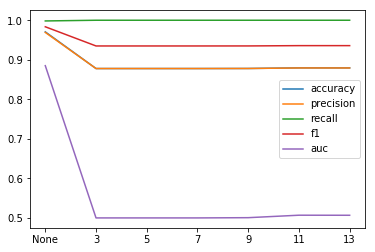

In [169]:
draw(depths, scores)

In [171]:
depths[0] = 'None'
print_score('max_depth', depths, scores)

max_depth=None  , accu=0.9706, prec=0.9692, recall=0.9982, f1=0.9835, auc=0.8851
max_depth=3     , accu=0.8778, prec=0.8778, recall=1.0000, f1=0.9349, auc=0.5000
max_depth=5     , accu=0.8778, prec=0.8778, recall=1.0000, f1=0.9349, auc=0.5000
max_depth=7     , accu=0.8778, prec=0.8778, recall=1.0000, f1=0.9349, auc=0.5000
max_depth=9     , accu=0.8780, prec=0.8780, recall=1.0000, f1=0.9350, auc=0.5006
max_depth=11    , accu=0.8795, prec=0.8793, recall=1.0000, f1=0.9358, auc=0.5069
max_depth=13    , accu=0.8795, prec=0.8793, recall=1.0000, f1=0.9358, auc=0.5067


max_depth = None的时候效果最好

###### XGBoost调参

n_estimators

In [172]:
n_estimators = [100, 200, 300, 400, 500]

In [173]:
scores = initialize_score()

In [174]:
for e in n_estimators:
    score = pa.xgb(n_estimators=e)
    scores['accuracy'].append(score[0])
    scores['precision'].append(score[1])
    scores['recall'].append(score[2])
    scores['f1'].append(score[3])
    scores['auc'].append(score[4])

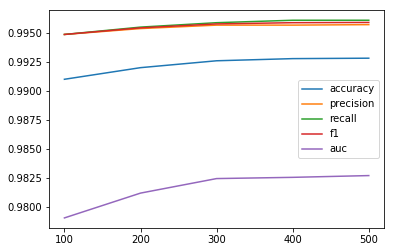

In [175]:
draw(n_estimators, scores)

In [176]:
print_score('n_estimators', n_estimators, scores)

n_estimators=100   , accu=0.9910, prec=0.9949, recall=0.9949, f1=0.9949, auc=0.9790
n_estimators=200   , accu=0.9920, prec=0.9954, recall=0.9955, f1=0.9954, auc=0.9812
n_estimators=300   , accu=0.9926, prec=0.9957, recall=0.9959, f1=0.9958, auc=0.9824
n_estimators=400   , accu=0.9928, prec=0.9957, recall=0.9961, f1=0.9959, auc=0.9825
n_estimators=500   , accu=0.9928, prec=0.9957, recall=0.9961, f1=0.9959, auc=0.9827


n_estimators=400时效果最好，本来想继续在此基础上测试其他参数的，但是试了一下需要跑太长时间，而且目前模型已经很优了，就不继续优化了。

#### 总结

KNN:accu=0.9424, prec=0.9627, recall=0.9721, f1=0.9674, auc=0.8506

SVM:accu=0.9873, prec=0.9901, recall=0.9955, f1=0.9928, auc=0.9621

RFC:accu=0.9728, prec=0.9714, recall=0.9984, f1=0.9847, auc=0.8937

XGB:accu=0.9928, prec=0.9957, recall=0.9961, f1=0.9959, auc=0.9825

>可以看出XGBoost在新闻分类中的表现最优

#### 额外测试

如果是由人来进行分类，一般会注意到新闻最后的所属新闻社，这里尝试一下在语料中去除“新华社”这个词，看看模型效果如何

In [191]:
with open('sentences.txt', 'r') as f:
    sentences = [s.strip() for s in f.readlines() if s.strip() != '新华社']

In [192]:
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(sentences)

In [193]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X_c)

In [194]:
pa = paramAdjusting(tfidf, y_c)

In [195]:
pa.xgb(n_estimators=400)

(0.9927838119327481,
 0.9956797966963151,
 0.9961016949152542,
 0.9958907011226436,
 0.9825210058011106)

>和之前的对比，模型评估基本一致，说明应该是新华社的用词方式以及报导的新闻内容和其他新闻社有区别。另外，由于数据集中，新华社新闻占比本来就比较高，所以模型的泛用性应该也不会多高，之后有机会可以用更加均匀的数据集来进行拟合

>另外，之前没有进行过专业调参，希望批改的老师给一点意见和建议！